# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load your preprocessed dataset.

In [1]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("data/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380216,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312210,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497682,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.391036,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134467,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


## (1) Correlation investigation

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

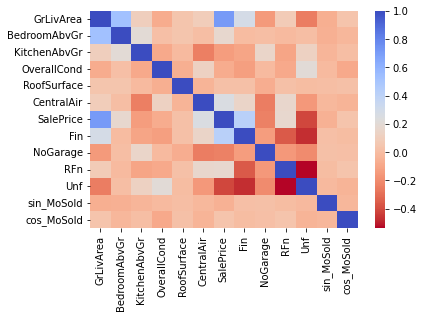

In [15]:
corr = data.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "coolwarm_r");

❓ Visualize the correlation between column pairs in a dataframe ❓

In [28]:
corr_df = corr.unstack().reset_index()
corr_df.columns = ['feature_1','feature_2', 'correlation']
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']]
corr_df.sort_values(by="correlation", ascending=False, inplace=True)
corr_df = corr_df.reset_index(drop=True)
corr_df

,feature_1,feature_2,correlation
0,GrLivArea,SalePrice,0.708524
1,SalePrice,GrLivArea,0.708524
2,GrLivArea,BedroomAbvGr,0.521522
3,BedroomAbvGr,GrLivArea,0.521522
4,Fin,SalePrice,0.419534
...,...,...,...
151,Unf,SalePrice,-0.410338
152,Unf,Fin,-0.473950
153,Fin,Unf,-0.473950
154,Unf,RFn,-0.536170


❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [29]:
correlated_features = len(corr_df[(corr_df['correlation'] >0.9) | (corr_df['correlation'] < -0.9)])
correlated_features

0

🧪 **Test your code**

In [30]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [32]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

base_model_score = cross_val_score(LinearRegression(), X, y, cv=5).mean()
base_model_score

0.6432139060434736

🧪 **Test your code**

In [34]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [43]:
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y)
permutation_score = permutation_importance(model, X, y, n_repeats=10)

importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T)
importance_df.columns=['feature','score decrease']

importance_df = importance_df.sort_values(by="score decrease", ascending = False).reset_index(drop=True)
importance_df

,feature,score decrease
0,GrLivArea,1.016391
1,BedroomAbvGr,0.067875
2,Fin,0.052887
3,Unf,0.02055
4,KitchenAbvGr,0.018684
5,CentralAir,0.01636
6,NoGarage,0.011864
7,RFn,0.010985
8,sin_MoSold,0.000927
9,OverallCond,0.000208


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [46]:
best_feature = importance_df.feature[0]
best_feature

7             RFn
8      sin_MoSold
9     OverallCond
10    RoofSurface
11     cos_MoSold
Name: feature, dtype: object

🧪 **Test your code**

In [40]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

In [47]:
features_less_important = importance_df.feature.tail(5)

new_X = X.drop(columns=features_less_important)

simplified_model_score = cross_val_score(LinearRegression(), new_X, y, cv=5).mean()
simplified_model_score

0.6450814014426761

🧪 **Test your code**

In [48]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.8.10, pytest-7.1.2, pluggy-1.0.0 -- /bin/python3
cachedir: .pytest_cache
rootdir: /home/quantium/labs/lewagon/data-challenges/05-ML/02-Prepare-the-dataset/02-Feature-Selection/tests
plugins: dash-1.19.0, anyio-3.6.1
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.10s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!